# Preprocesamiento de Datos – Fuentes UNID

Este notebook tiene como objetivo transformar y preparar los datos de las fuentes no identificadas (UNIDs), contenidas en el archivo `unids_3F_beta_err_names.txt`, para su uso en modelos de detección de anomalías como One-Class SVM.

A diferencia de las fuentes ASTRO, las variables de los UNIDs no están logarítmicamente transformadas. Dado que el modelo se entrena con datos ASTRO ya transformados en `log10`, es necesario aplicar la misma transformación a los UNIDs para garantizar la coherencia de escala.

Las variables transformadas serán:
- `E_peak`
- `beta`
- `sigma_det`
- `beta_Rel`

Los datos procesados se guardarán tanto en formato `.csv` como `.txt` para facilitar su reutilización.

In [168]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# UNIDS

# Ruta
raw_path = '../../data/raw/unids_3F_beta_err_names.txt'
output_dir = '../../data/processed/unids_log'
os.makedirs(output_dir, exist_ok=True)

# Leer datos
cols_unids = ['E_peak', 'beta', 'sigma_det', 'beta_Rel', 'number']
df_unids = pd.read_csv(raw_path, sep='\s+', header=0, names=cols_unids)

# ASTRO
features_astro = ['Log(E_peak)', 'Log(beta)', 'Log(sigma)', 'Log(beta_Rel)', 'astro_DM']
df_astro = pd.read_csv('../../data/processed/XY_bal_log_Rel/astro/astro_df.txt', sep="\s+", names=features_astro, engine='python', skiprows=1)

In [169]:
# Ver muestra
df_unids.head()

,E_peak,beta,sigma_det,beta_Rel,number
0,2.51290,0.0897,7.3996,1.630992,0
1,1.47820,0.4163,5.4150,0.770838,1
2,1.59640,0.6783,10.7909,0.371222,2
3,0.93095,0.2771,7.6056,0.628654,3
4,0.44480,0.3207,4.2748,0.567509,4


In [170]:
df_astro.head()

,Log(E_peak),Log(beta),Log(sigma),Log(beta_Rel),astro_DM
0,-0.412502,-1.325139,1.356951,-0.122193,0.0
1,0.708140,-0.000174,0.623167,-1.601886,0.0
2,0.224740,-0.581202,1.010041,-0.311249,0.0
3,0.257319,-0.561933,0.615413,-0.038913,0.0
4,0.326110,-1.100179,1.624932,-0.528753,0.0


In [171]:
df_unids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   E_peak     1125 non-null   float64
 1   beta       1125 non-null   float64
 2   sigma_det  1125 non-null   float64
 3   beta_Rel   1125 non-null   float64
 4   number     1125 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 44.1 KB


In [172]:
df_astro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2831 entries, 0 to 2830
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Log(E_peak)    2831 non-null   float64
 1   Log(beta)      2831 non-null   float64
 2   Log(sigma)     2831 non-null   float64
 3   Log(beta_Rel)  2831 non-null   float64
 4   astro_DM       2831 non-null   float64
dtypes: float64(5)
memory usage: 110.7 KB


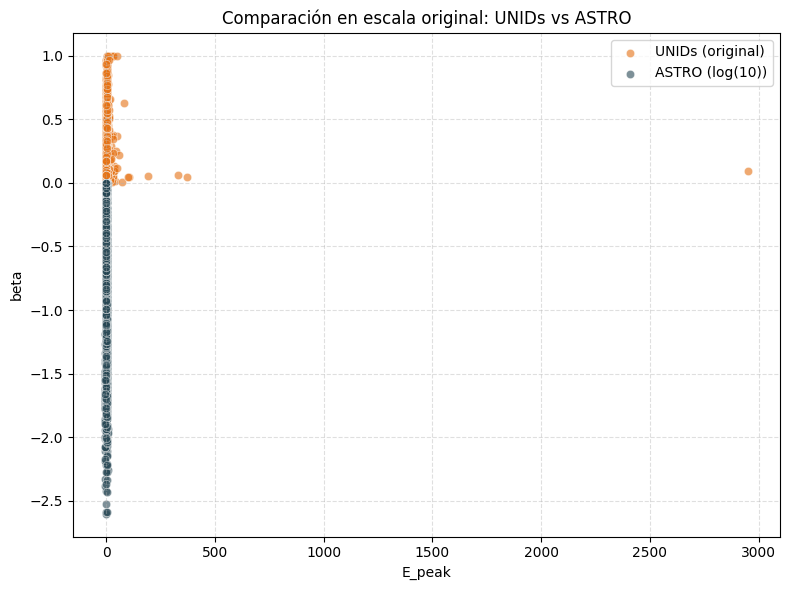

In [173]:
# Scatter con datos sin transformar
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_unids['E_peak'], y=df_unids['beta'], color='#e57113', label='UNIDs (original)', alpha=0.6)
sns.scatterplot(x=df_astro['Log(E_peak)'], y=df_astro['Log(beta)'], color='#264653', label='ASTRO (log(10))', alpha=0.6)
plt.title('Comparación en escala original: UNIDs vs ASTRO')
plt.xlabel('E_peak')
plt.ylabel('beta')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

## Transformación de las columnas de UNIDS a log(10) - Generar archivos

In [174]:
# Aplicar transformación log10 (evitar log(0))
df_unids_log = df_unids.copy()
features = ['E_peak', 'beta', 'sigma_det', 'beta_Rel']
for col in features:
    df_unids_log[col] = np.log10(df_unids[col].replace(0, np.nan))
    df_unids_log[col] = df_unids_log[col].replace(-np.inf, np.nan).fillna(df_unids_log[col].min())

# Guardar como CSV y TXT
csv_path = os.path.join(output_dir, 'unids_log.csv')
txt_path = os.path.join(output_dir, 'unids_log.txt')

df_unids_log.to_csv(csv_path, index=False)
df_unids_log.to_csv(txt_path, index=False, header=False, sep=' ')

print(f"✅ Datos UNIDs transformados guardados en:\n{csv_path}\n{txt_path}")

df_unids_log.head()

✅ Datos UNIDs transformados guardados en:
../../data/processed/unids_log/unids_log.csv
../../data/processed/unids_log/unids_log.txt


,E_peak,beta,sigma_det,beta_Rel,number
0,0.400175,-1.047208,0.869208,0.212452,0
1,0.169733,-0.380594,0.733598,-0.113037,1
2,0.203142,-0.168578,1.033058,-0.430366,2
3,-0.031074,-0.557363,0.881133,-0.201588,3
4,-0.351835,-0.493901,0.630916,-0.246028,4


In [175]:
df_unids_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   E_peak     1125 non-null   float64
 1   beta       1125 non-null   float64
 2   sigma_det  1125 non-null   float64
 3   beta_Rel   1125 non-null   float64
 4   number     1125 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 44.1 KB


In [176]:
# Volver a leer datos generados guardados para verificar
df_unids_log2 = pd.read_csv(csv_path)
df_unids_log2 = pd.read_csv(txt_path, sep="\s+", header=None, names=cols_unids)
df_unids_log2.head()

,E_peak,beta,sigma_det,beta_Rel,number
0,0.400175,-1.047208,0.869208,0.212452,0
1,0.169733,-0.380594,0.733598,-0.113037,1
2,0.203142,-0.168578,1.033058,-0.430366,2
3,-0.031074,-0.557363,0.881133,-0.201588,3
4,-0.351835,-0.493901,0.630916,-0.246028,4


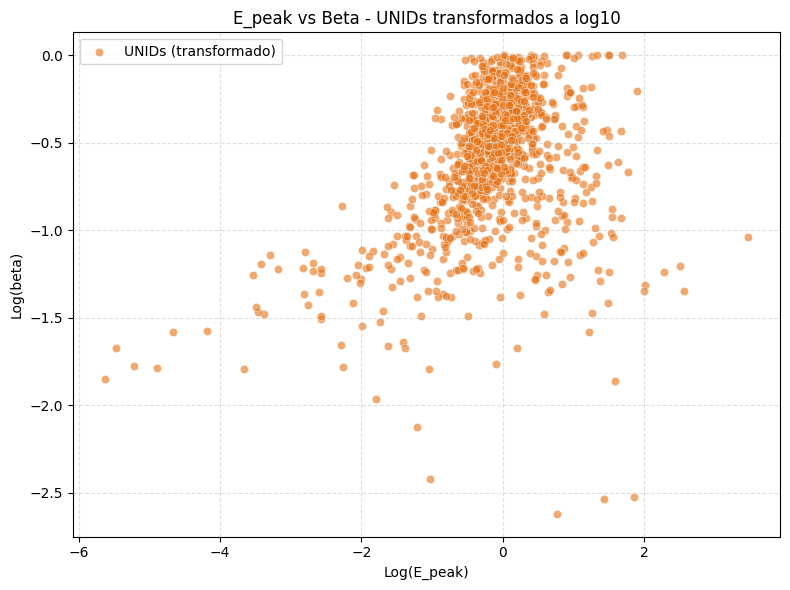

In [177]:
# Scatter con datos transformados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_unids_log2['E_peak'], y=df_unids_log2['beta'], color='#e57113', label='UNIDs (transformado)', alpha=0.6)
plt.title('E_peak vs Beta - UNIDs transformados a log10') 
plt.xlabel('Log(E_peak)')
plt.ylabel('Log(beta)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

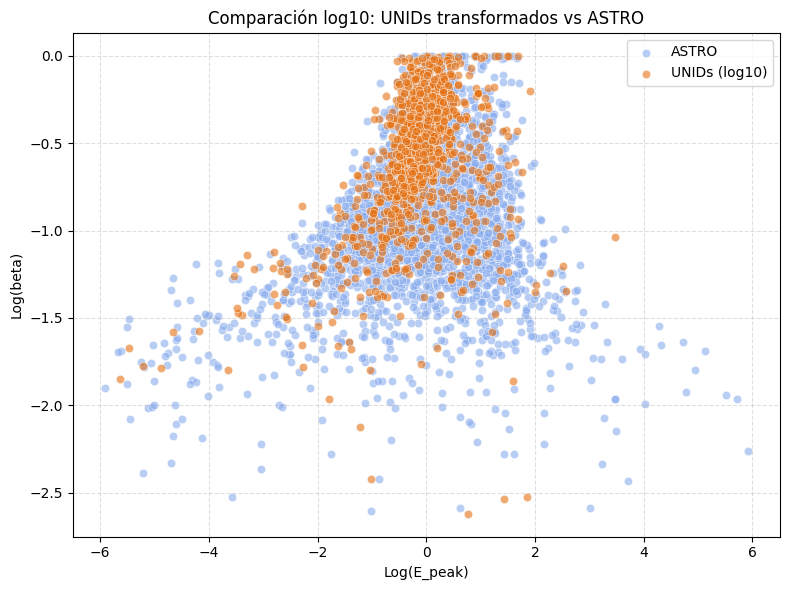

In [178]:
# Scatter en escala log10
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_astro['Log(E_peak)'], y=df_astro['Log(beta)'], color="#89ACEE", label='ASTRO', alpha=0.6)
sns.scatterplot(x=df_unids_log2['E_peak'], y=df_unids_log2['beta'], color="#e57113", label='UNIDs (log10)', alpha=0.6)
plt.title('Comparación log10: UNIDs transformados vs ASTRO')
plt.xlabel('Log(E_peak)')
plt.ylabel('Log(beta)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


## Conclusión

Con esta transformación, las fuentes UNID están ahora en la misma escala logarítmica que las fuentes ASTRO. Este paso es esencial para evitar inconsistencias al aplicar modelos de detección de anomalías como One-Class SVM.

Los archivos resultantes (`unids_log.csv` y `unids_log.txt`) están listos para ser utilizados en los notebooks de análisis y predicción posteriores.

## Comparación visual antes y después de la transformación logarítmica

Para comprobar la consistencia entre los datos UNID y ASTRO, se comparan ambas fuentes primero en su escala original y luego tras aplicar la transformación logarítmica base 10 (`log10`) a los UNIDs.

- En escala original, los valores de `E_peak` y `beta` de los UNIDs se encuentran en un rango muy diferente al de los ASTRO.
- Una vez transformados a escala `log10`, los valores de UNIDs se alinean mejor con los de ASTRO, lo que valida la transformación y confirma que ahora los conjuntos son comparables.

Esta transformación es esencial para asegurar la coherencia cuando se utilice el modelo One-Class SVM entrenado exclusivamente con datos ASTRO.